Data Analysis

In [28]:
import re
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk import download
import gensim
from gensim import corpora
from gensim.models import CoherenceModel, LdaModel
import matplotlib.pyplot as plt
import numpy as np

download('punkt')
download('stopwords')
download('wordnet')


[nltk_data] Downloading package punkt to /Users/stacytsai/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/stacytsai/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/stacytsai/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [29]:
data = pd.read_csv('merged_reddit_posts.csv')
data['Text'] = data['Title'] + ' ' + data['Content'].fillna('')  
data.drop_duplicates(subset='ID', keep='first', inplace=True)
data = data[~data['Text'].str.contains("weekly roundup for week of")]
text_lengths = data['Text'].apply(len)  
text_stats = text_lengths.describe()  

print("Descriptive statistics for text length：")
print(text_stats)

num_texts = len(data['Text'])
print(f"There are a total of {num_texts} texts")

Descriptive statistics for text length：
count     2087.000000
mean       449.101581
std       1172.811043
min         14.000000
25%         67.000000
50%        114.000000
75%        479.000000
max      28485.000000
Name: Text, dtype: float64
There are a total of 2087 texts


In [30]:
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    return text

data['Cleaned_Text'] = data['Text'].apply(clean_text)

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
custom_stop_words = ['ev', 'vehicle', 'car', 'im', 'wa', 'ha', 'dont', 'u', 'doe',
                     'ive', 'id', 'v', 'doesnt', 'cant', 'hi', 'isnt', 'k', 'wont', 'le', 
                     'e', 'r', 'wouldnt', 'youre', 'x', 'hello', 'couldnt', 'arent', 
                     'wasnt', 'hey', 'l', 'f', 'q', 'st', 'lol', 'n', 'c', 'th', 
                     'would', 'could', 'didnt', 'j', 'b', 'w', 'etc', 'whats',
                     'one', 'two', 'three', 'weve', 'ok', 'okay','ea','mi','ex','h', 'p', 'g','na', 'thanks',
                     'also', 'may', 'thats', 'might','done','thank', 'must','need','people']

stop_words.update(custom_stop_words)

def tokenize_and_lemmatize(text):
    words = word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    filtered_words = [word for word in lemmatized_words if word not in stop_words]
    return filtered_words
data['Processed_Text'] = data['Cleaned_Text'].apply(tokenize_and_lemmatize)
dictionary = corpora.Dictionary(data['Processed_Text'])
dictionary.filter_extremes(no_below=10, no_above=0.35, keep_n=10000)
corpus = [dictionary.doc2bow(text) for text in data['Processed_Text']]

In [31]:
original_word_list = [word for text in data['Cleaned_Text'] for word in text.split()]
cleaned_word_list = [word for text in data['Processed_Text'] for word in text]

# Display the first 100 words before cleaning
print("First 100 words before cleaning:", original_word_list[:100])

# Display the first 100 words after cleaning
print("First 100 words after cleaning:", cleaned_word_list[:100])

# Display the total number of words before and after cleaning
print("Total number of words before cleaning:", len(original_word_list))
print("Total number of words after cleaning:", len(cleaned_word_list))

First 100 words before cleaning: ['type', 'to', 'schuko', 'adapter', 'issue', 'hi', 'ive', 'type', 'to', 'schuko', 'adapters', 'that', 'ive', 'used', 'over', 'those', 'years', 'in', 'italian', 'enelx', 'charging', 'stations', 'but', 'i', 'normally', 'draw', 'w', 'and', 'had', 'no', 'issue', 'starting', 'from', 'this', 'month', 'i', 'got', 'a', 'new', 'charger', 'and', 'i', 'can', 'charge', 'up', 'to', 'kw', 'but', 'after', 'minute', 'of', 'power', 'higher', 'than', 'kw', 'the', 'charging', 'station', 'does', 'the', 'clack', 'and', 'disconnects', 'the', 'plug', 'saying', 'charge', 'terminated', 'i', 'get', 'no', 'error', 'and', 'the', 'help', 'support', 'says', 'there', 'is', 'no', 'error', 'and', 'thats', 'probably', 'my', 'adapter', 'the', 'scheme', 'should', 'be', 'correct', 'and', 'works', 'perfectly', 'fine', 'up', 'to', 'around', 'kw', 'just']
First 100 words after cleaning: ['type', 'schuko', 'adapter', 'issue', 'type', 'schuko', 'adapter', 'used', 'year', 'italian', 'enelx', 'ch

In [32]:
# Define a function to display text before and after cleaning
def display_original_and_processed(text):
    # Clean the text
    cleaned_text = clean_text(text)
    # Tokenize and lemmatize
    processed_words = tokenize_and_lemmatize(cleaned_text)
    # Display results
    print("Original text:", text)
    print("Cleaned text:", cleaned_text)
    print("Text after tokenization and lemmatization:", processed_words)

# Example text
example_text = data['Text'].iloc[290]
display_original_and_processed(example_text)

word_freq = sorted(dictionary.dfs.items(), key=lambda x: x[1], reverse=True)[:100]
for word_id, freq in word_freq:
    print(f'Word: {dictionary[word_id]}, Frequency: {freq}')

Original text: Change of plans for the Model 2? What's happening between Tesla and India 
Cleaned text: change of plans for the model  whats happening between tesla and india 
Text after tokenization and lemmatization: ['change', 'plan', 'model', 'happening', 'tesla', 'india']
Word: electric, Frequency: 417
Word: charging, Frequency: 376
Word: tesla, Frequency: 346
Word: like, Frequency: 305
Word: new, Frequency: 292
Word: charger, Frequency: 286
Word: battery, Frequency: 285
Word: charge, Frequency: 271
Word: get, Frequency: 266
Word: time, Frequency: 226
Word: year, Frequency: 205
Word: know, Frequency: 199
Word: first, Frequency: 193
Word: model, Frequency: 189
Word: make, Frequency: 176
Word: use, Frequency: 175
Word: drive, Frequency: 169
Word: anyone, Frequency: 158
Word: range, Frequency: 156
Word: home, Frequency: 154
Word: even, Frequency: 151
Word: much, Frequency: 149
Word: go, Frequency: 148
Word: want, Frequency: 148
Word: really, Frequency: 147
Word: say, Frequency: 146
W

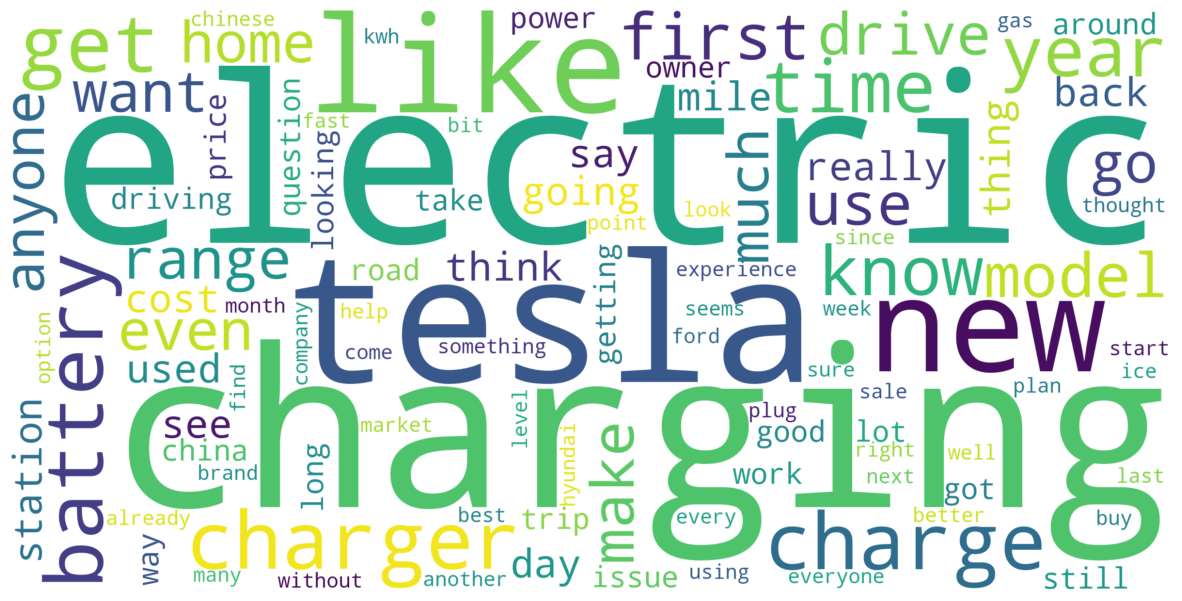

In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

word_freq_dict = {dictionary[word_id]: freq for word_id, freq in word_freq}

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=300,            
    min_font_size=10,         
    scale=3,                  
    stopwords=stop_words      
).generate_from_frequencies(word_freq_dict)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.show()


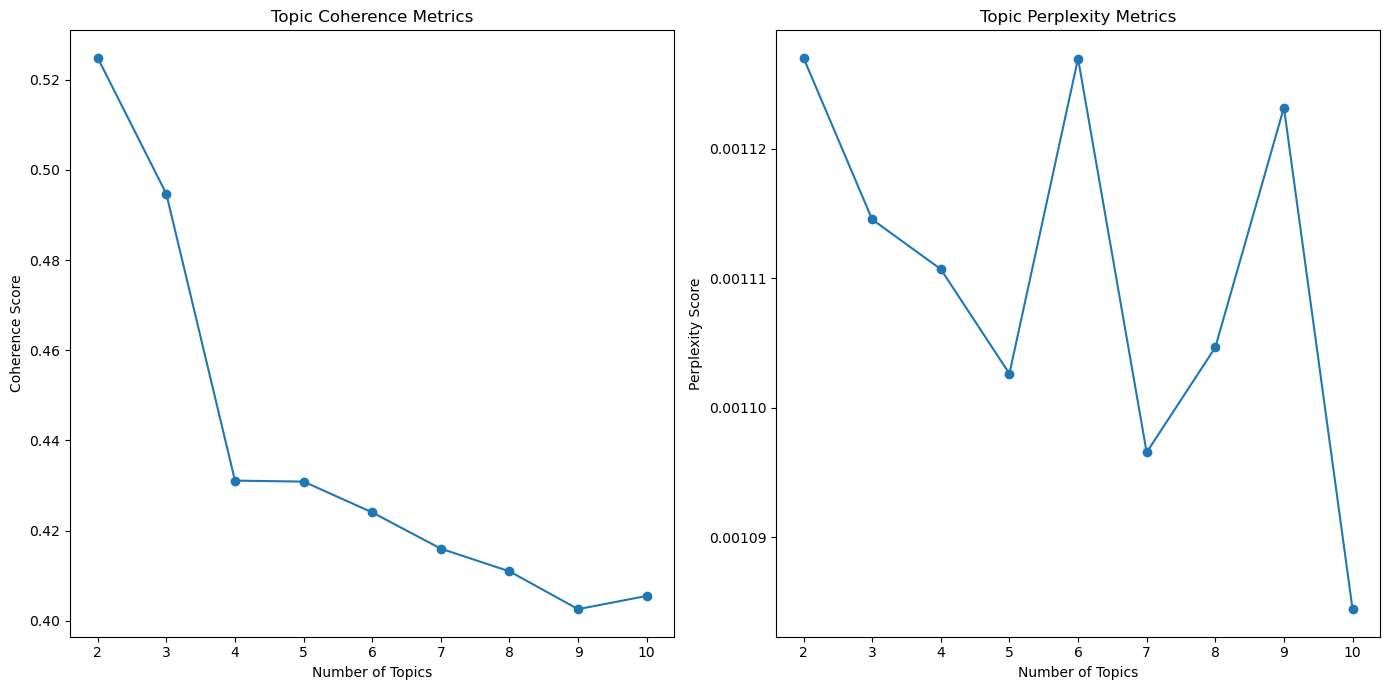

In [34]:
# 計算不同主題數量的困惑度和一致性分數
def compute_coherence_values(dictionary, corpus, texts, start, limit, step):
    coherence_values = []
    perplexity_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, passes=20, random_state=42)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        # 计算非对数形式的困惑度
        perplexity_values.append(np.exp(model.log_perplexity(corpus)))
    return model_list, coherence_values, perplexity_values

start, limit, step = 2, 11, 1  # 設置主題數量範圍從2到10
model_list, coherence_values, perplexity_values = compute_coherence_values(dictionary, corpus, data['Processed_Text'], start, limit, step)

# 繪製一致性分數和困惑度的折線圖
x = range(start, limit, step)
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.plot(x, coherence_values, marker='o')
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Topic Coherence Metrics")

plt.subplot(1, 2, 2)
plt.plot(x, perplexity_values, marker='o')
plt.xlabel("Number of Topics")
plt.ylabel("Perplexity Score")
plt.title("Topic Perplexity Metrics")

plt.tight_layout()
plt.show()



In [35]:
num_topics = 5
start = 2  

index = num_topics - start 

coherence_score = coherence_values[index]
perplexity_score = perplexity_values[index]

print(f"Coherence Score at {num_topics} topics: {coherence_score}")
print(f"Perplexity Score at {num_topics} topics: {perplexity_score}")

Coherence Score at 5 topics: 0.4308701316030776
Perplexity Score at 5 topics: 0.0011026374579929095


In [36]:
# Train the final LDA model
final_lda_model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, passes=15, random_state=42)

# Print each topic and its keywords
for idx, topic in final_lda_model.print_topics(num_words=20):
    print(f'Topic: {idx} \nKeywords: {topic}')

# Analyze the main topic of each document
topic_counts = [0] * num_topics  # Initialize a counter based on the number of topics
for doc_bow in corpus:
    topics = final_lda_model.get_document_topics(doc_bow)
    # Calculate the main topic index for each document (no need to adjust the index)
    main_topic = max(topics, key=lambda x: x[1])[0]
    # Direct counting
    topic_counts[main_topic] += 1

# Calculate the total number of documents and the proportion of each topic
total_docs = len(corpus)
topic_proportions = [count / total_docs for count in topic_counts]

print("Topic Counts:", topic_counts)
print("Topic Proportions:", topic_proportions)

Topic: 0 
Keywords: 0.034*"charging" + 0.032*"charger" + 0.016*"adapter" + 0.015*"charge" + 0.015*"got" + 0.015*"use" + 0.013*"get" + 0.012*"cable" + 0.012*"home" + 0.011*"like" + 0.011*"tesla" + 0.011*"level" + 0.010*"dc" + 0.009*"long" + 0.008*"type" + 0.008*"since" + 0.008*"plug" + 0.008*"trip" + 0.007*"drive" + 0.007*"really"
Topic: 1 
Keywords: 0.029*"range" + 0.026*"mile" + 0.020*"year" + 0.018*"month" + 0.015*"price" + 0.014*"kw" + 0.012*"tesla" + 0.012*"charging" + 0.012*"find" + 0.011*"model" + 0.011*"used" + 0.011*"insurance" + 0.011*"bolt" + 0.011*"performance" + 0.009*"great" + 0.009*"dcfc" + 0.009*"interior" + 0.009*"look" + 0.008*"polestar" + 0.008*"rate"
Topic: 2 
Keywords: 0.039*"electric" + 0.032*"new" + 0.020*"tesla" + 0.016*"model" + 0.012*"around" + 0.012*"china" + 0.011*"ford" + 0.010*"station" + 0.010*"equinox" + 0.009*"first" + 0.009*"chevrolet" + 0.009*"suv" + 0.008*"market" + 0.008*"say" + 0.008*"like" + 0.008*"company" + 0.007*"gm" + 0.007*"brand" + 0.007*"got

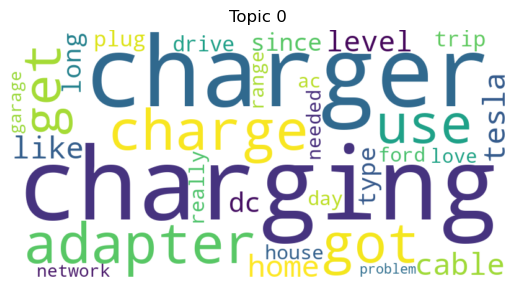

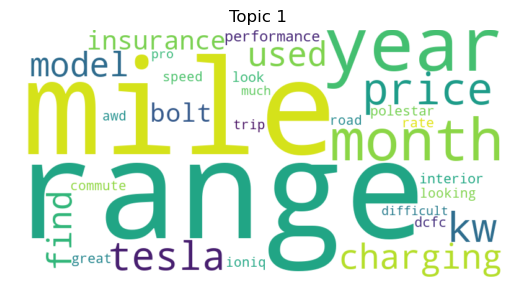

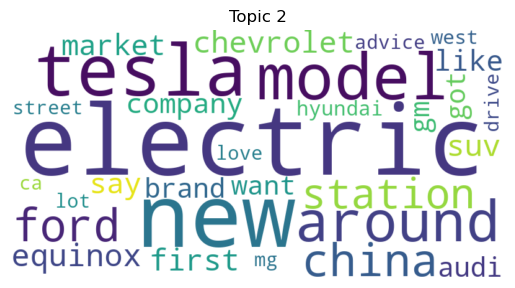

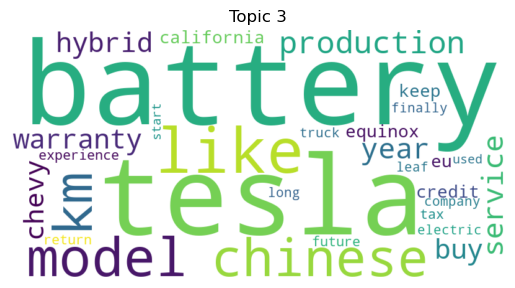

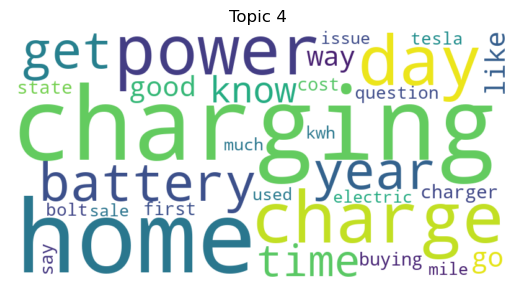

In [37]:
from collections import Counter
from wordcloud import WordCloud

for idx, topic in final_lda_model.show_topics(formatted=False, num_words=30):
    wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False).generate_from_frequencies(dict(topic))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Topic {}".format(idx))
    plt.show()


In [38]:
document_topics = [final_lda_model.get_document_topics(doc_bow) for doc_bow in corpus]
target_topic_id = 0
relevant_docs = [
    (idx, topic_prob) for idx, topics in enumerate(document_topics)
    for topic_id, topic_prob in topics
    if topic_id == target_topic_id and topic_prob >= 0.1
]

relevant_docs_sorted = sorted(relevant_docs, key=lambda x: x[1], reverse=True)[:100]

for doc_idx, topic_prob in relevant_docs_sorted:
    print(f"\nDocument Index: {doc_idx}")
    print(f"Topic Probability: {topic_prob}")
    print(f"Original Text: {data['Text'].iloc[doc_idx]}\n{'-'*80}")



Document Index: 2045
Topic Probability: 0.9917335510253906
Original Text: Ford charging at Tesla Supercharger - just BS marketing Sorry to rant but I have been a Tesla guys since the first roadster. So two years ago I decided to get a Ford Lightning and I love it. The problem is the charging networks outside of Tesla suck. So I was thrilled to hear we can now charge at the same network that is available anywhere. I have done cross country trips with my model S and was looking forward to doing the same with my Lightning. Here is the problem. I can’t get the adapter to let me charge at Tesla Superchargers. Even though I put the order in as soon as I got the email, my adapter won’t arrive until late September. I call Ford and I got “it is what it is” answer. Yet on YouTube you see all these YouTubers with the adapter and showing us how great it is. Tesla is a master at this also. Announce or sell something like the cybertruck and set a delivery date of late 2027. I am a huge supporter of

In [39]:
document_topics = [final_lda_model.get_document_topics(doc_bow) for doc_bow in corpus]
target_topic_id = 1
relevant_docs = [
    (idx, topic_prob) for idx, topics in enumerate(document_topics)
    for topic_id, topic_prob in topics
    if topic_id == target_topic_id and topic_prob >= 0.1
]

relevant_docs_sorted = sorted(relevant_docs, key=lambda x: x[1], reverse=True)[:100]

for doc_idx, topic_prob in relevant_docs_sorted:
    print(f"\nDocument Index: {doc_idx}")
    print(f"Topic Probability: {topic_prob}")
    print(f"Original Text: {data['Text'].iloc[doc_idx]}\n{'-'*80}")



Document Index: 2035
Topic Probability: 0.9985969066619873
Original Text: Which of these used EV's should I buy? (Updated - VW vs Volvo)  Hey everyone,

This is an updated post based on feedback I received from my prior post.

I'm looking and financing a lightly used EV. I commute 75 miles a day for work and about 20,000 miles a year in total. I am currently commuting in my 2005 Ford F-250 5.4 Gasser getting 12MPG - meaning my gasoline spend every year is roughly $7500. Our electric rates are very low - 0.9 cents per kWh and that's accounting for peak usage times (WA has a lot of hydroelectricity, windmills, solar, etc)

**My life situation:** I own a Duplex where my girlfriend, myself and our two German shepherds live in one side and we rent out the other side for rental income. My girlfriend and I go to Portland (About 225 Mi away) once a month to pickup raw food for our dogs and we tend to try and make a trip out of it each time, occasionally travel to Western WA.

**My typical dai

In [40]:
document_topics = [final_lda_model.get_document_topics(doc_bow) for doc_bow in corpus]
target_topic_id = 2
relevant_docs = [
    (idx, topic_prob) for idx, topics in enumerate(document_topics)
    for topic_id, topic_prob in topics
    if topic_id == target_topic_id and topic_prob >= 0.1
]

relevant_docs_sorted = sorted(relevant_docs, key=lambda x: x[1], reverse=True)[:100]

for doc_idx, topic_prob in relevant_docs_sorted:
    print(f"\nDocument Index: {doc_idx}")
    print(f"Topic Probability: {topic_prob}")
    print(f"Original Text: {data['Text'].iloc[doc_idx]}\n{'-'*80}")



Document Index: 2029
Topic Probability: 0.9849734902381897
Original Text: seeking purchase advice Any purchasing advice or suggestions are welcome.  First foray into e-cars, and it is overwhelming to learn and understand all the issues.  Just want a practical good looking, reliable car with good tech support.  New or late model used.

I Live in Portland OR/Pacific NW.  

Our budget around $35-50K

Probably looking at a hatchback or SUV.  New or late model/low mileage used.

Considering:  Hyundai Ionic 5 (N-cool), Tesla Y or 3, Kia EV6, Toyota Prius Prime, VW ID4. Polestars and Rivians look awesome, but probably not for us.

I am guessing I do around 200 miles+/- per week - with occasional trips around the west from California to BC

Thanks to any and all that can shed any light!
--------------------------------------------------------------------------------

Document Index: 2038
Topic Probability: 0.9831406474113464
Original Text: What to choose? Need station waggon or SUV Hi everyon

In [41]:
document_topics = [final_lda_model.get_document_topics(doc_bow) for doc_bow in corpus]
target_topic_id = 3
relevant_docs = [
    (idx, topic_prob) for idx, topics in enumerate(document_topics)
    for topic_id, topic_prob in topics
    if topic_id == target_topic_id and topic_prob >= 0.1
]

relevant_docs_sorted = sorted(relevant_docs, key=lambda x: x[1], reverse=True)[:100]

for doc_idx, topic_prob in relevant_docs_sorted:
    print(f"\nDocument Index: {doc_idx}")
    print(f"Topic Probability: {topic_prob}")
    print(f"Original Text: {data['Text'].iloc[doc_idx]}\n{'-'*80}")



Document Index: 2017
Topic Probability: 0.9825124144554138
Original Text: Faraday Future [$FFIE] had more than 14,000 reservations in late 2023 for FF-91 and finally. Production starts June 12th with 300+ pre-orders. Production starts now!!  Seriously.
  I'm going to keep this simple and ask that you do some additional DD and look for these using Freespoke and other sources.  
  Google has been very questionable in their search parameters, as most already know.  
  Production should have begun,  
PRIOR TO GOING PUBLIC.   
  From the IPO till now, there have been several irregularities involved with the company.    
  But the fact remains they currently have 300+ FF-91 $309,000 cars on pre-order and finally.  
Production restarted.   https://eletric-vehicles.com/faraday-future/faraday-future-shares-surge-as-company-restarts-deliveries/  
Faraday Future at the end of late 2023 had 14,000 reservations but they did not have the means to make that happen.  
 They have completely finished t

In [42]:
document_topics = [final_lda_model.get_document_topics(doc_bow) for doc_bow in corpus]
target_topic_id = 4
relevant_docs = [
    (idx, topic_prob) for idx, topics in enumerate(document_topics)
    for topic_id, topic_prob in topics
    if topic_id == target_topic_id and topic_prob >= 0.1
]

relevant_docs_sorted = sorted(relevant_docs, key=lambda x: x[1], reverse=True)[:100]

for doc_idx, topic_prob in relevant_docs_sorted:
    print(f"\nDocument Index: {doc_idx}")
    print(f"Topic Probability: {topic_prob}")
    print(f"Original Text: {data['Text'].iloc[doc_idx]}\n{'-'*80}")



Document Index: 498
Topic Probability: 0.9947257041931152
Original Text: General Questions and Purchasing Advice Thread — Week of July 01, 2024 **Need help choosing an EV, finding a home charger, or understanding whether you're eligible for a tax credit? Vehicle and product recommendation requests, buying experiences, and questions on credits/financing are all fair game here.** 

# Is an EV right for me? 

Generally speaking, electric vehicles imply a larger upfront cost than a traditional vehicle, but will pay off over time as your consumables cost (electricity instead of fuel) can be anywhere from 1/4 to 1/2 the cost. Calculators are available to help you estimate cost — here are some we recommend: 

* [https://www.chargevc.org/ev-calculator/](https://www.chargevc.org/ev-calculator/)
* [https://chooseev.com/savings-calculator/](https://chooseev.com/savings-calculator/)
* [https://electricvehicles.bchydro.com/learn/fuel-savings-calculator](https://electricvehicles.bchydro.com/learn/f

Time

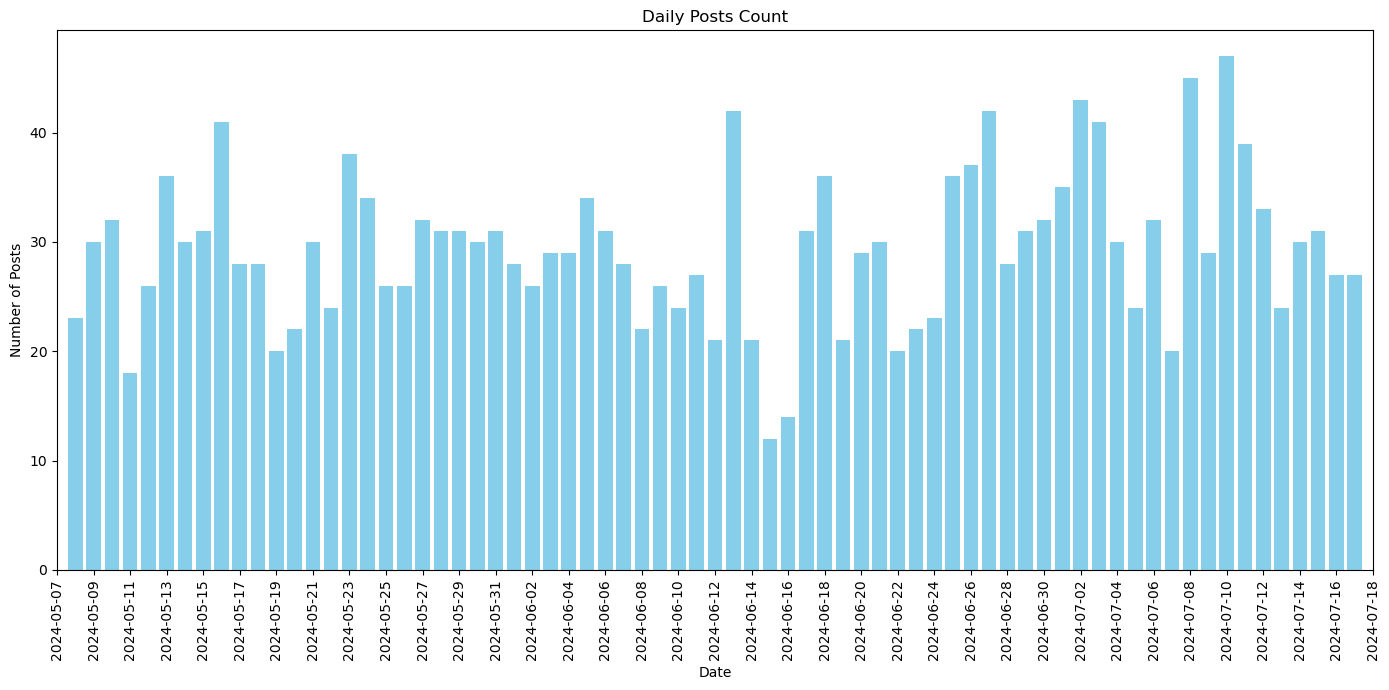

In [43]:
import matplotlib.dates as mdates

data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

daily_counts = data.resample('D').size()

plt.figure(figsize=(14, 7))
plt.bar(daily_counts.index, daily_counts.values, color='skyblue')
plt.title('Daily Posts Count')
plt.xlabel('Date')
plt.ylabel('Number of Posts')


ax = plt.gca()  
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))  
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  


start_date = pd.to_datetime('2024-05-07')
end_date = pd.to_datetime('2024-07-18')
ax.set_xlim(start_date, end_date)


plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [44]:
daily_counts = data.resample('D').size()
average_posts = daily_counts.mean()
median_posts = daily_counts.median()
max_posts = daily_counts.max()
min_posts = daily_counts.min()
std_dev_posts = daily_counts.std()

print(f"Average number of daily posts: {average_posts}")
print(f"Median number of daily posts: {median_posts}")
print(f"Maximum number of daily posts: {max_posts}")
print(f"Minimum number of daily posts: {min_posts}")
print(f"Standard deviation of daily posts: {std_dev_posts}")

Average number of daily posts: 29.3943661971831
Median number of daily posts: 30.0
Maximum number of daily posts: 47
Minimum number of daily posts: 12
Standard deviation of daily posts: 6.980542085457336


SNA

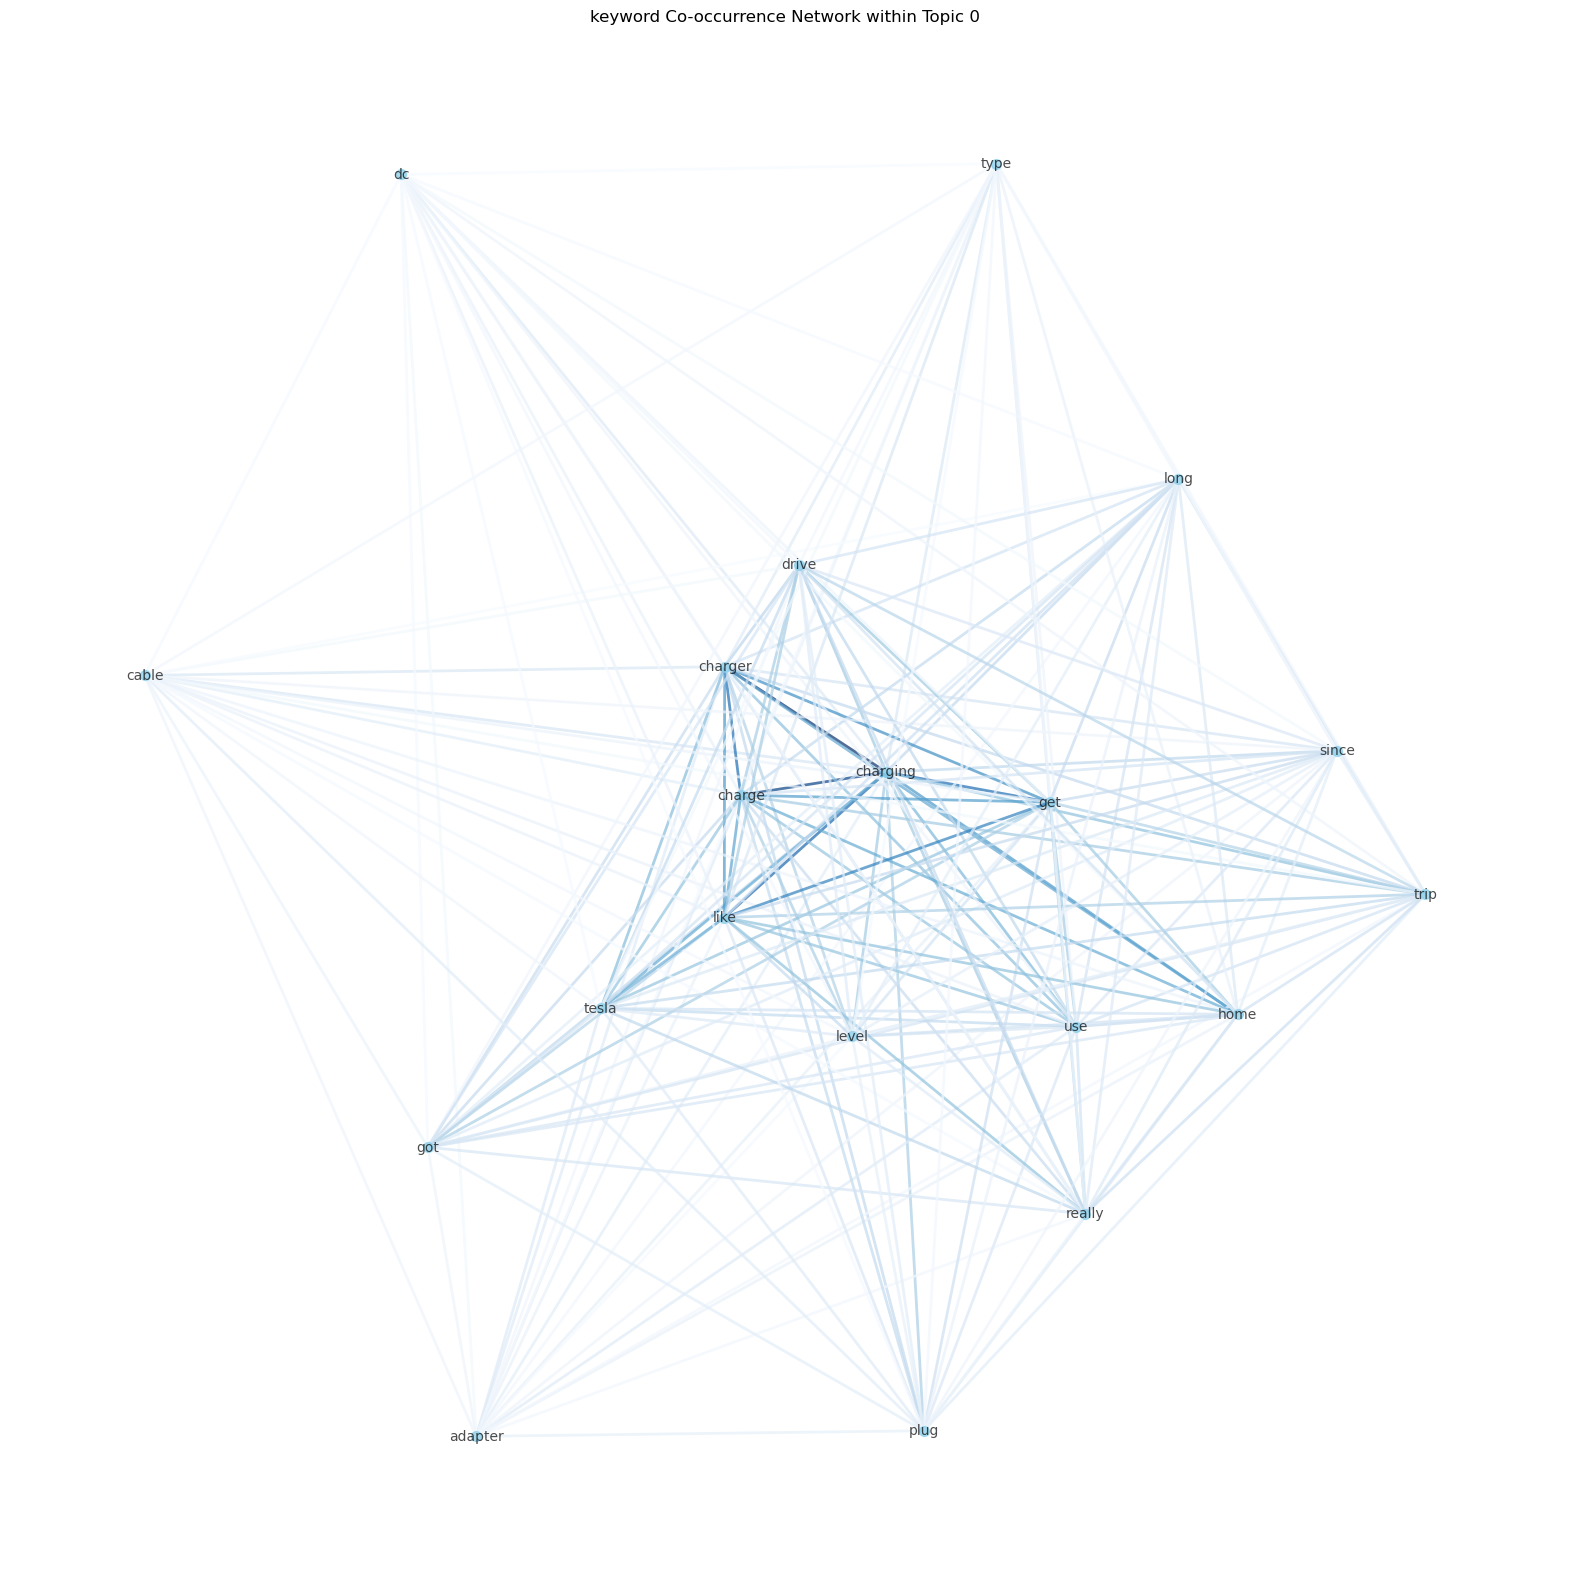

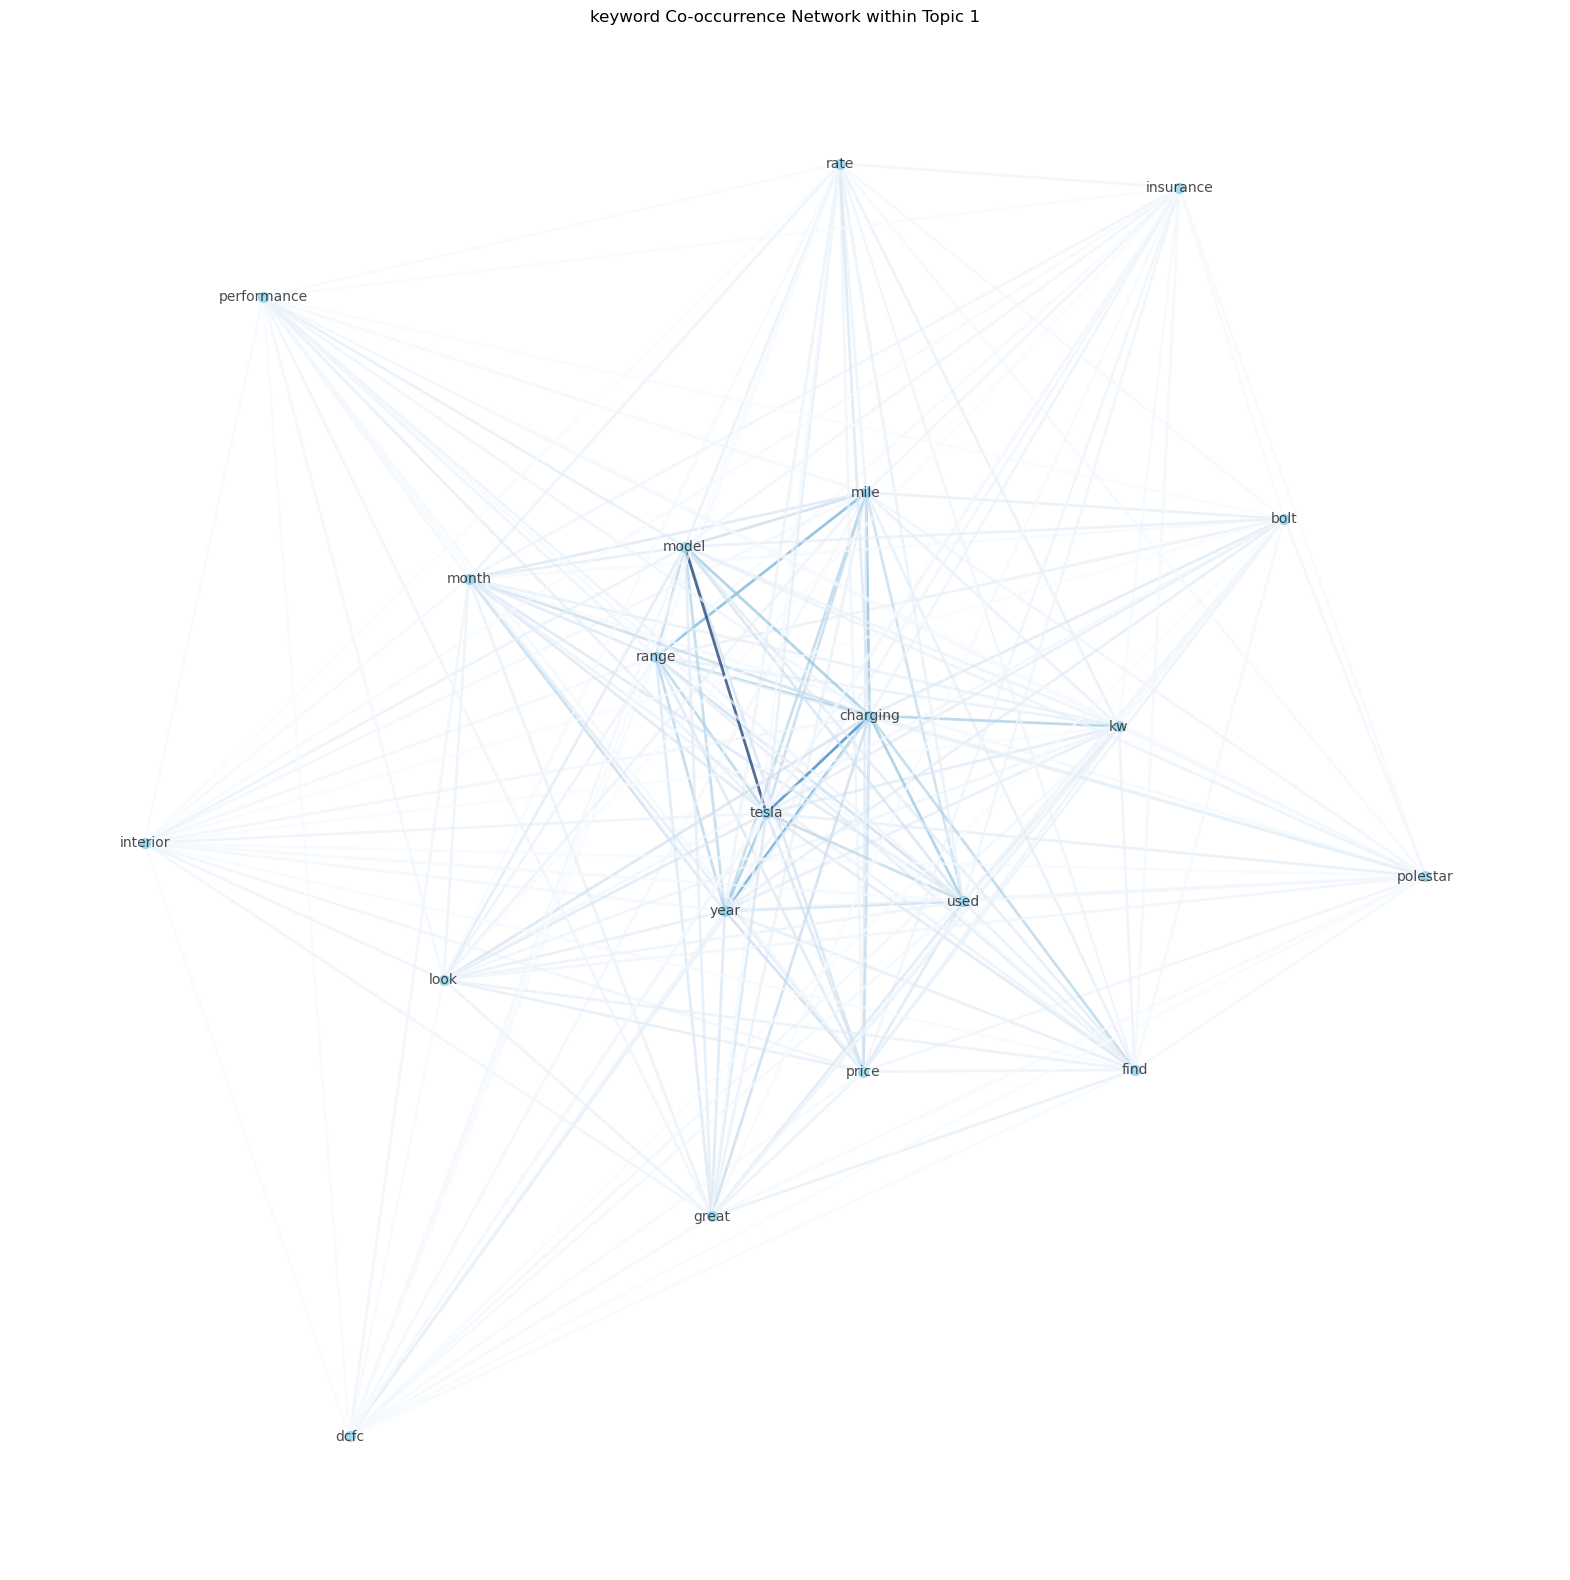

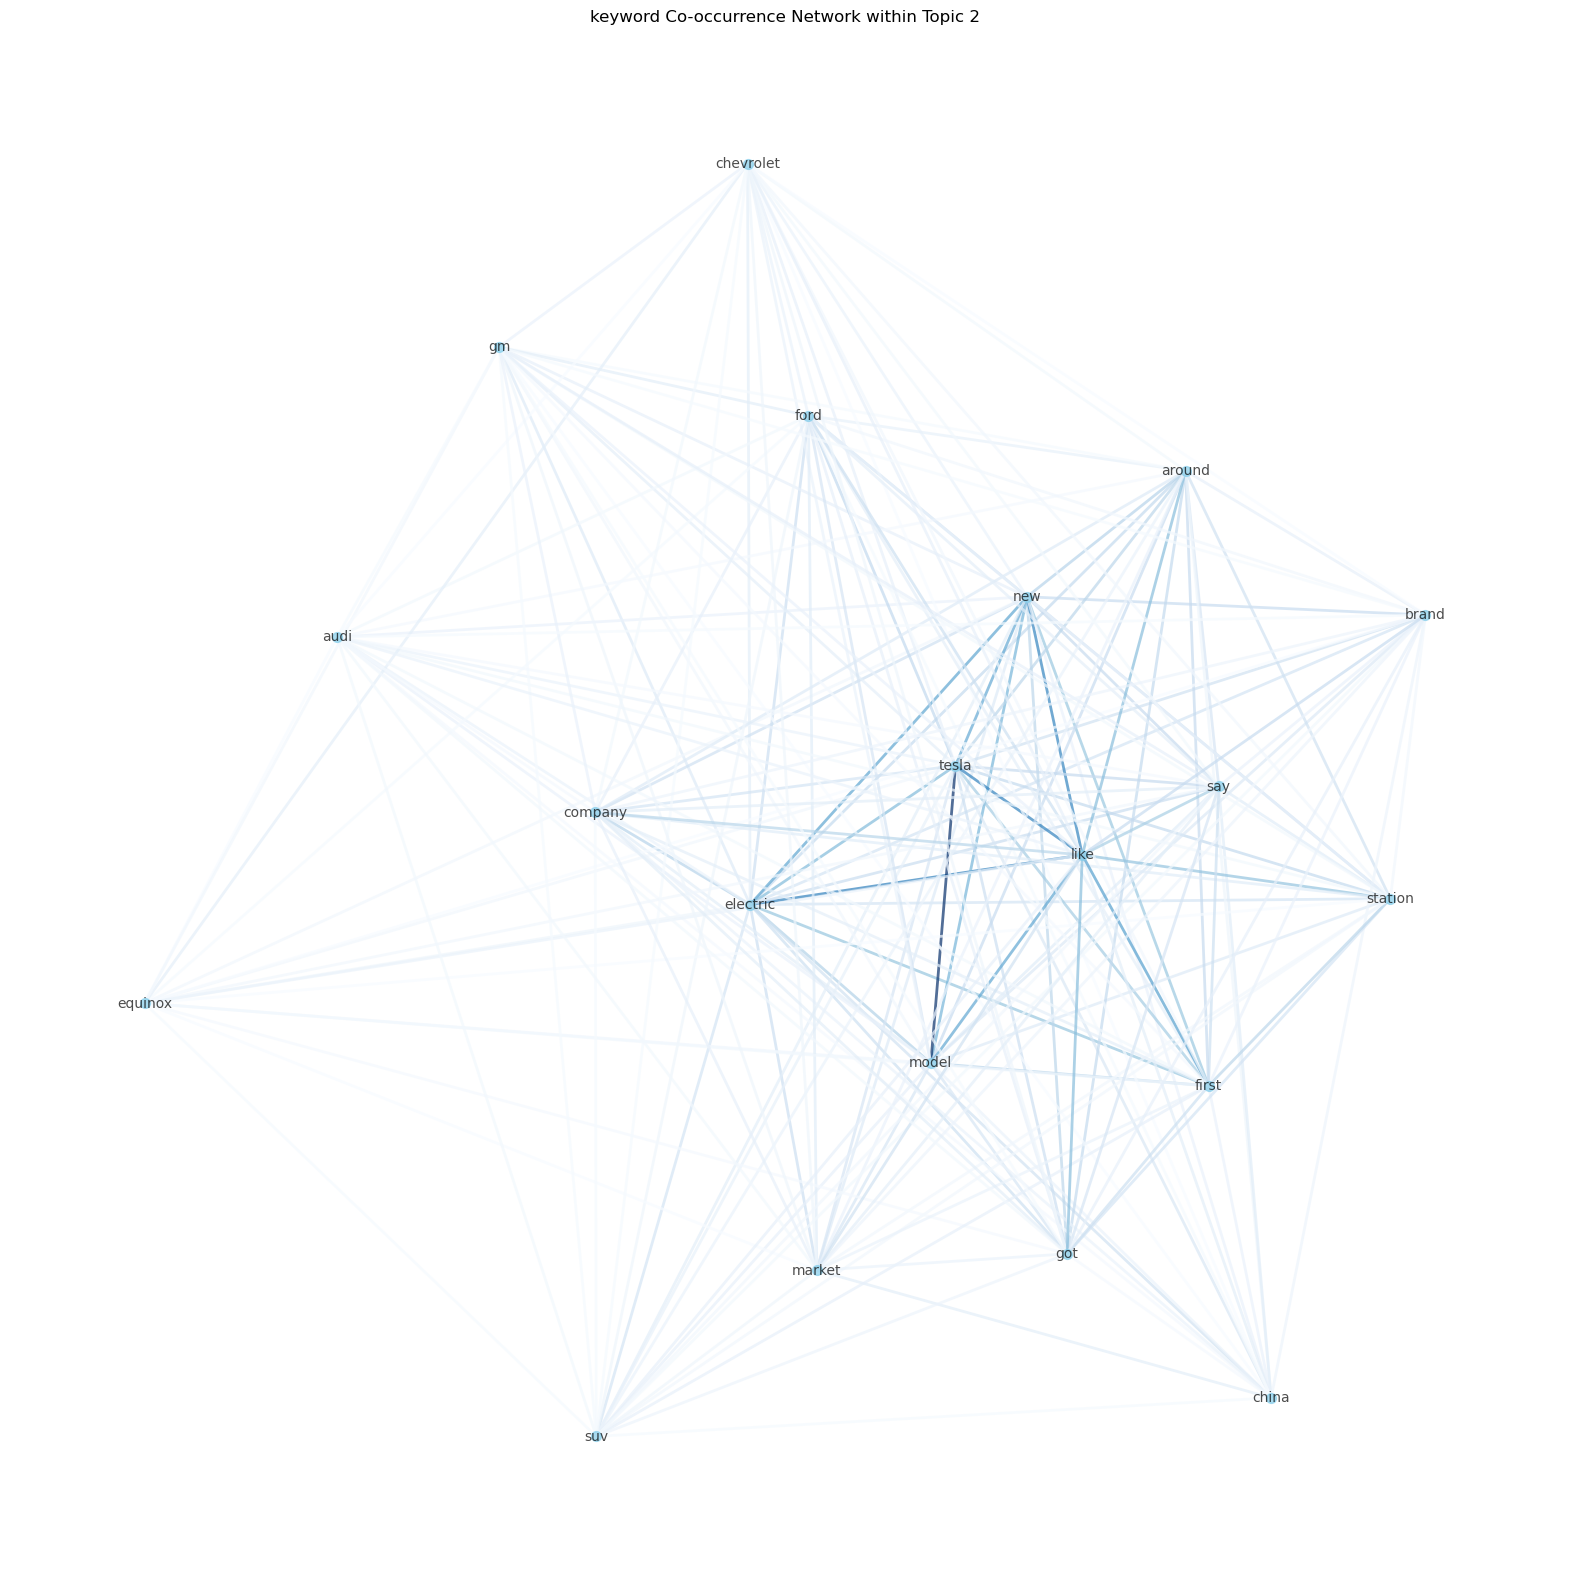

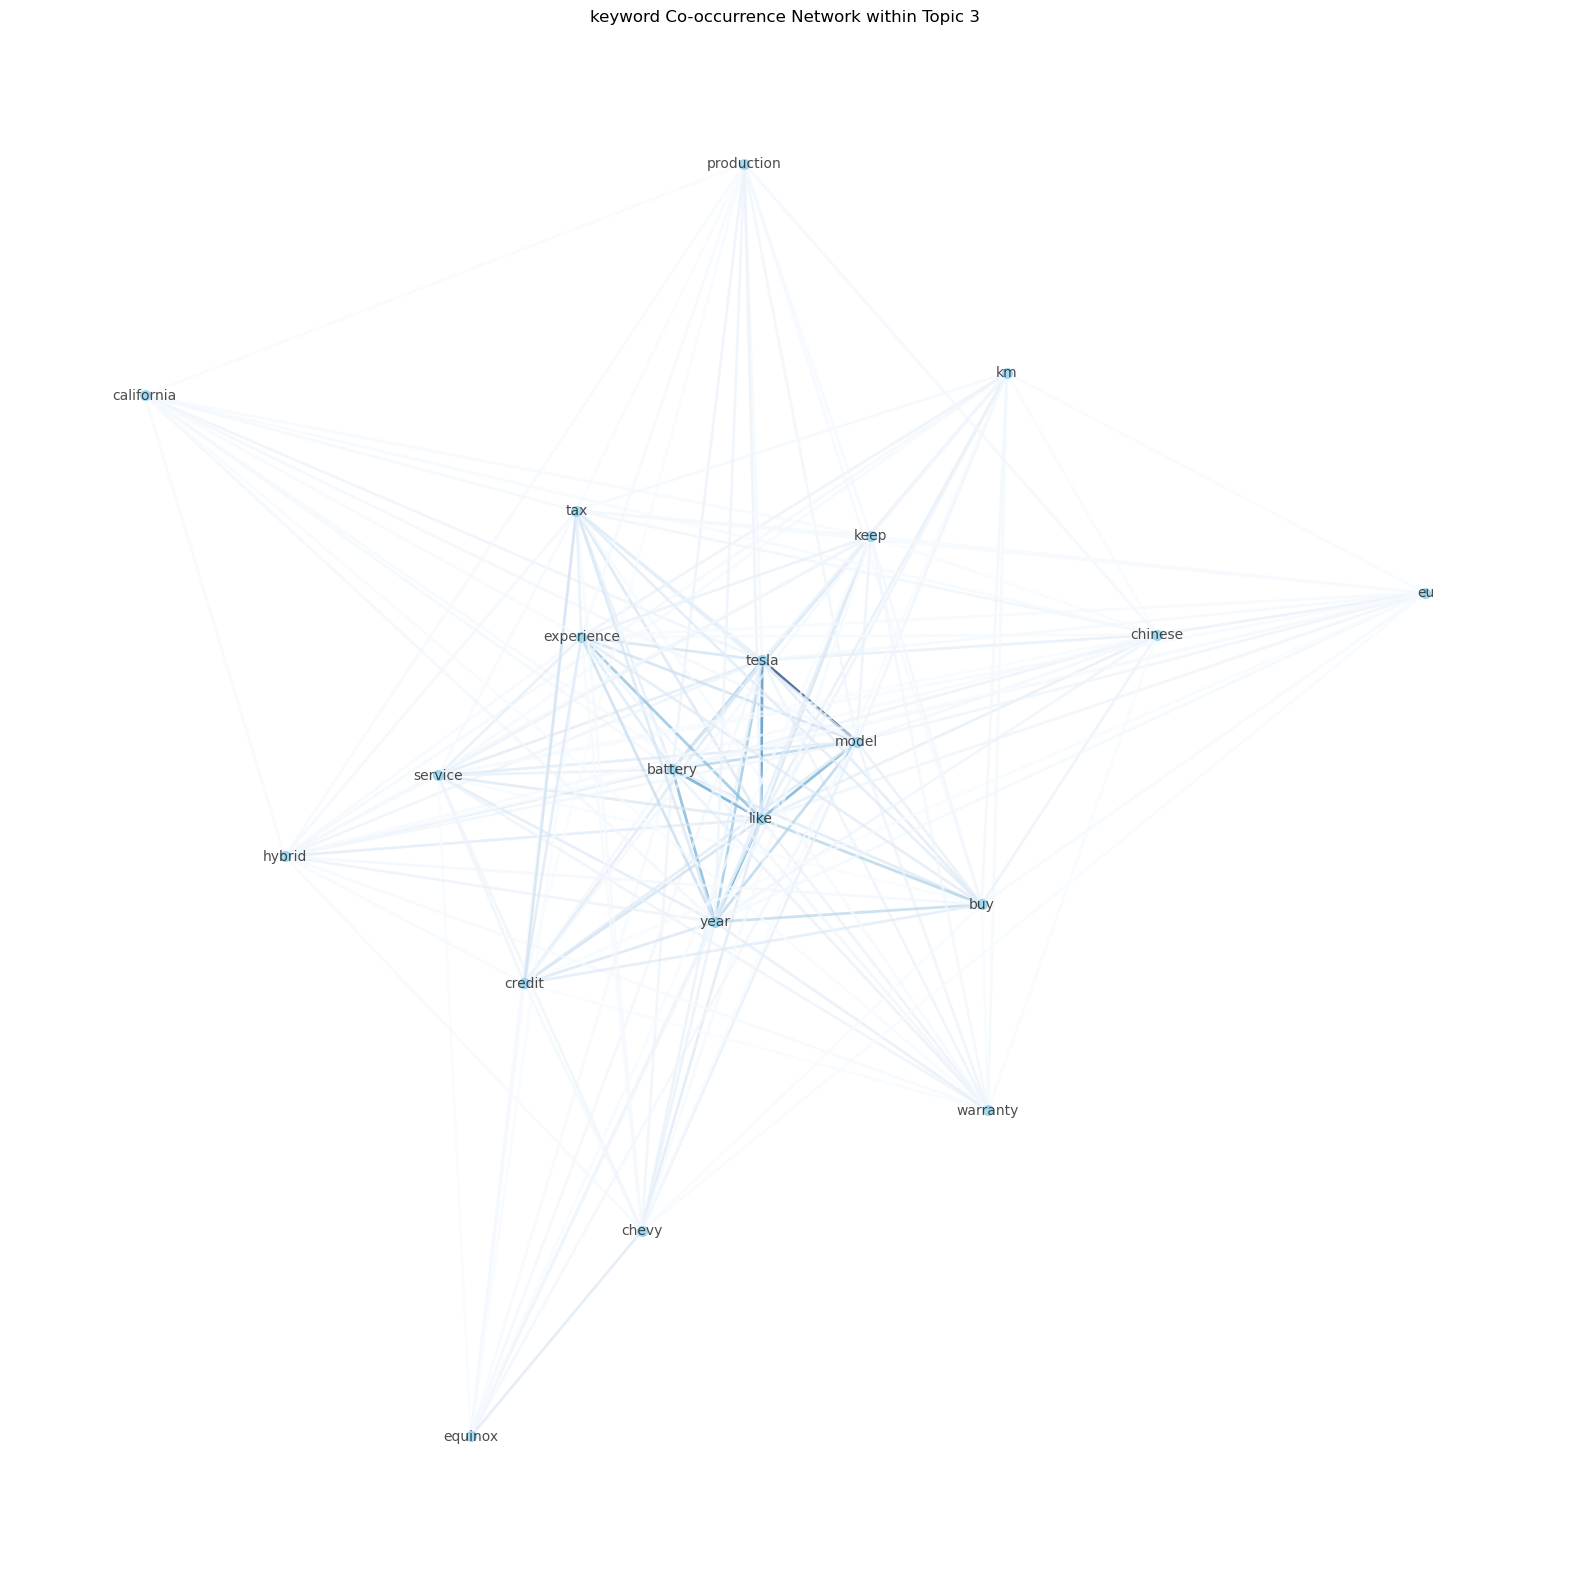

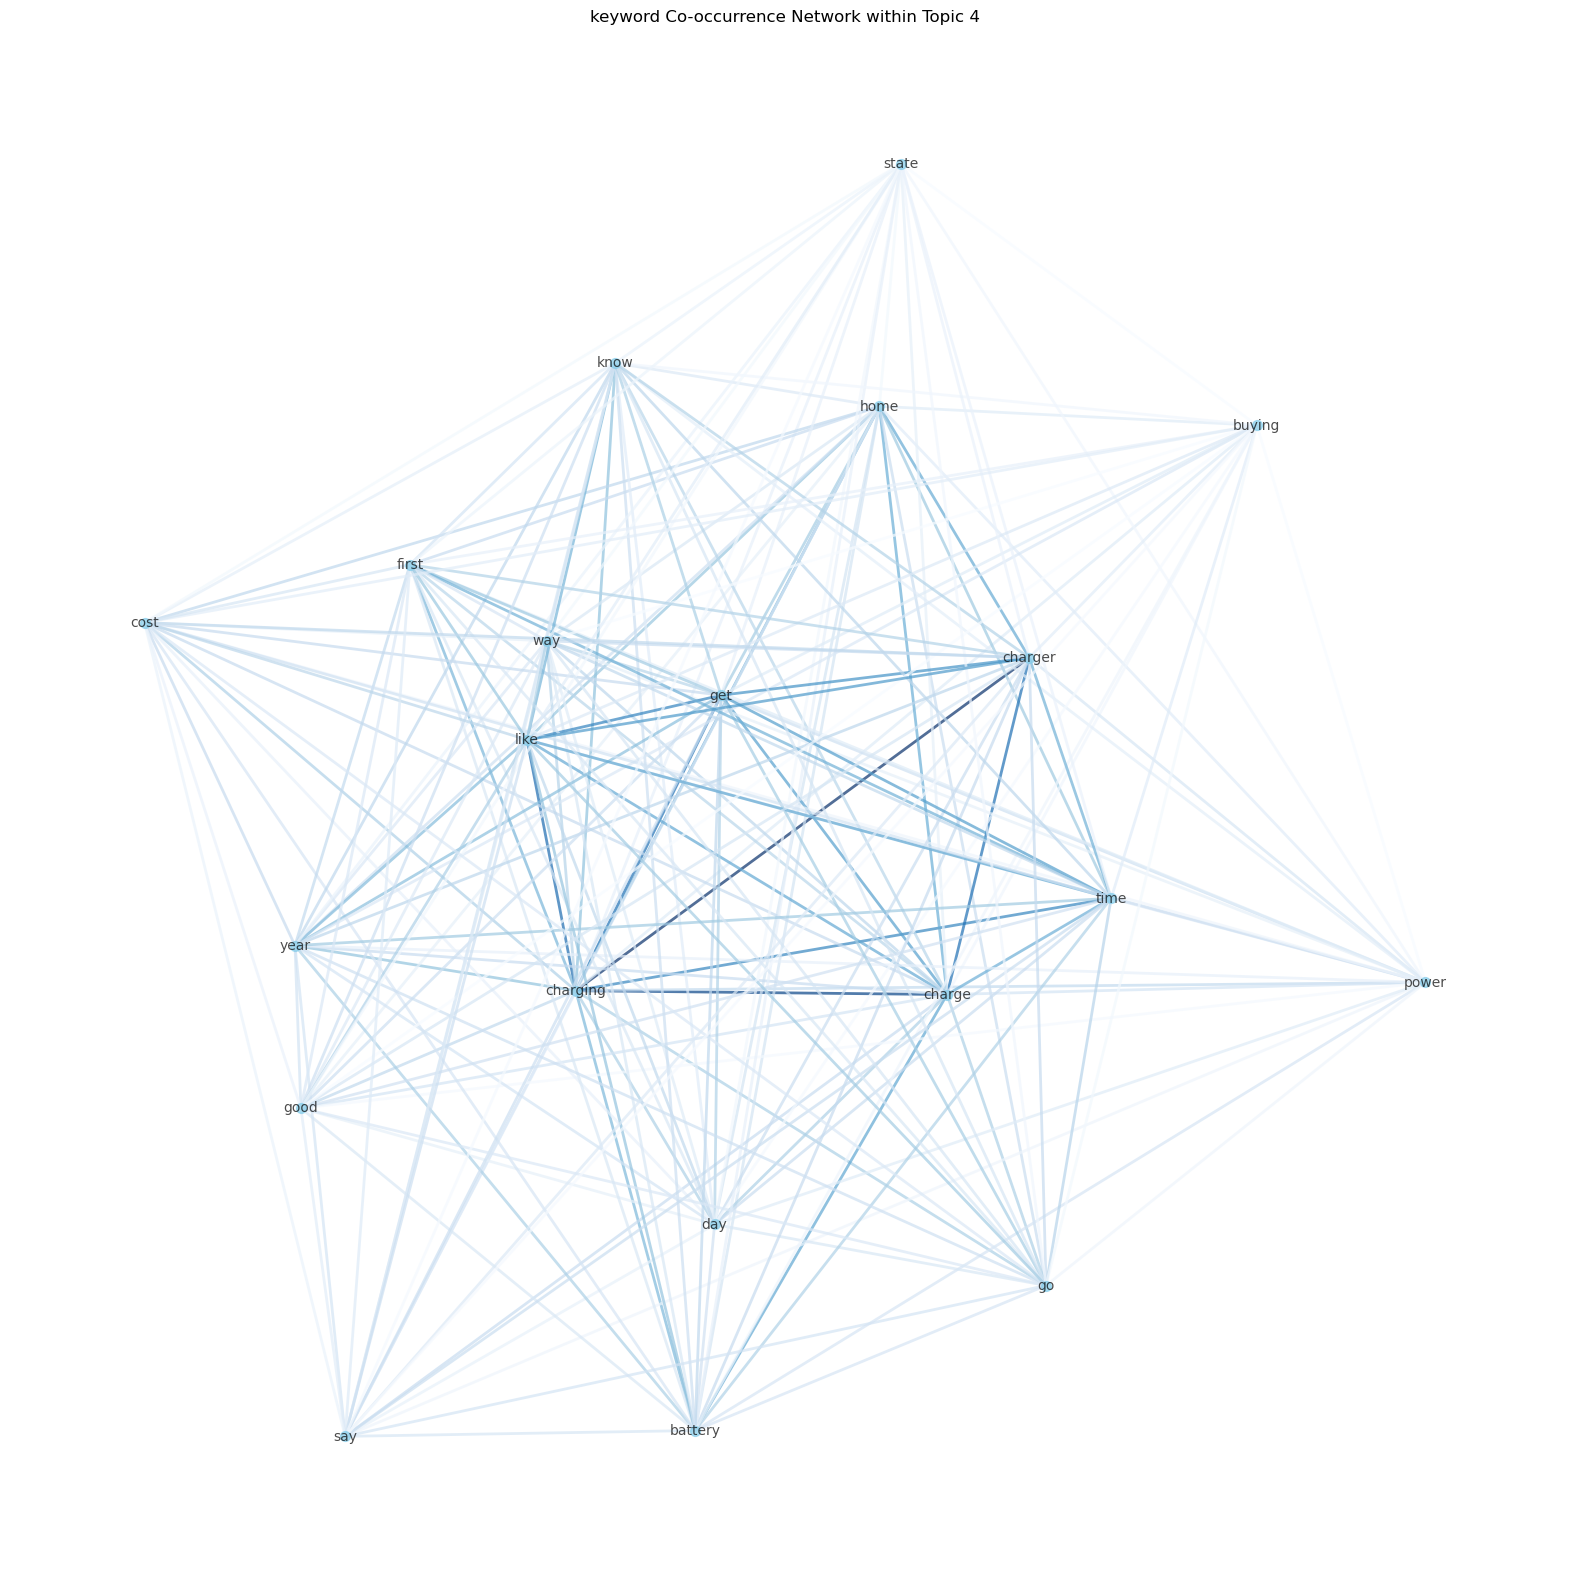

In [45]:
import matplotlib.pyplot as plt
import networkx as nx
from itertools import combinations
from gensim.models import LdaModel
import numpy as np

# Operate on each topic
for topic_id in range(5):  
    # Extract the top 20 keywords for this topic
    topic_keywords = [word for word, _ in final_lda_model.show_topic(topic_id, topn=20)]
    
    # Initialize a co-occurrence network
    G = nx.Graph()
    
    # Add nodes
    for keyword in topic_keywords:
        G.add_node(keyword)
    
    # Compute co-occurrence within the documents
    for document in data['Processed_Text']:
        present_keywords = [word for word in topic_keywords if word in document]
        for word1, word2 in combinations(present_keywords, 2):
            if G.has_edge(word1, word2):
                G[word1][word2]['weight'] += 1
            else:
                G.add_edge(word1, word2, weight=1)

    # Draw the graph using a Spring layout
    pos = nx.spring_layout(G, k=0.15, iterations=20)
    
    # Prepare edge weights and colors for drawing
    edges, weights = zip(*nx.get_edge_attributes(G, 'weight').items())
    norm = plt.Normalize(min(weights), max(weights))
    edge_colors = [plt.cm.Blues(norm(weight)) for weight in weights]

    # Draw the network graph
    fig, ax = plt.subplots(figsize=(20, 20))
    nx.draw(G, pos, ax=ax, node_color='skyblue', node_size=50, edgelist=edges,
            edge_color=edge_colors, width=2, with_labels=True, font_size=10, font_color='black', alpha=0.7)
    
    plt.title(f'keyword Co-occurrence Network within Topic {topic_id}')
    plt.show()


In [46]:
# Initialize a DataFrame to store centrality statistics
centrality_stats = pd.DataFrame(columns=['Topic', 'Average Degree Centrality', 'SD Degree Centrality', 'Average Closeness Centrality', 'SD Closeness Centrality'])

# Operate on each topic
for topic_id in range(5):  # Assuming there are 5 topics
    # Extract the top 30 keywords for this topic
    topic_keywords = [word for word, _ in final_lda_model.show_topic(topic_id, topn=30)]
    
    # Initialize a co-occurrence network
    G = nx.Graph()
    
    # Add nodes
    for keyword in topic_keywords:
        G.add_node(keyword)
    
    # Compute co-occurrence within the documents
    for document in data['Processed_Text']:
        present_keywords = [word for word in topic_keywords if word in document]
        for word1, word2 in combinations(present_keywords, 2):
            if G.has_edge(word1, word2):
                G[word1][word2]['weight'] += 1
            else:
                G.add_edge(word1, word2, weight=1)

    # Calculate degree centrality
    degree_centrality = nx.degree_centrality(G)
    centrality_values = np.array(list(degree_centrality.values()))
    avg_degree_centrality = np.mean(centrality_values)
    sd_degree_centrality = np.std(centrality_values)

    # Calculate closeness centrality
    closeness_centrality = nx.closeness_centrality(G)
    closeness_values = np.array(list(closeness_centrality.values()))
    avg_closeness_centrality = np.mean(closeness_values)
    sd_closeness_centrality = np.std(closeness_values)

    # Store statistics in the DataFrame
    centrality_stats.loc[topic_id] = [topic_id, avg_degree_centrality, sd_degree_centrality, avg_closeness_centrality, sd_closeness_centrality]

    # Print the results for each topic
    print(f"Network characteristics for Topic {topic_id}:")
    print(f"Average Degree Centrality: {avg_degree_centrality:.4f}")
    print(f"Standard Deviation of Degree Centrality: {sd_degree_centrality:.4f}")
    print(f"Average Closeness Centrality: {avg_closeness_centrality:.4f}")
    print(f"Standard Deviation of Closeness Centrality: {sd_closeness_centrality:.4f}")


Network characteristics for Topic 0:
Average Degree Centrality: 0.9954
Standard Deviation of Degree Centrality: 0.0117
Average Closeness Centrality: 0.9956
Standard Deviation of Closeness Centrality: 0.0113
Network characteristics for Topic 1:
Average Degree Centrality: 1.0000
Standard Deviation of Degree Centrality: 0.0000
Average Closeness Centrality: 1.0000
Standard Deviation of Closeness Centrality: 0.0000
Network characteristics for Topic 2:
Average Degree Centrality: 0.9379
Standard Deviation of Degree Centrality: 0.0828
Average Closeness Centrality: 0.9467
Standard Deviation of Closeness Centrality: 0.0664
Network characteristics for Topic 3:
Average Degree Centrality: 0.8920
Standard Deviation of Degree Centrality: 0.1100
Average Closeness Centrality: 0.9108
Standard Deviation of Closeness Centrality: 0.0841
Network characteristics for Topic 4:
Average Degree Centrality: 0.9977
Standard Deviation of Degree Centrality: 0.0086
Average Closeness Centrality: 0.9978
Standard Deviati